In [1]:
import pandas as pd
import numpy as np


In [6]:
# Step 1: Load the dataset
url = 'https://github.com/suyash1912/hr_data_analysis/releases/download/data/hr_analysis_data.csv'
df = pd.read_csv(url)

print("Initial Shape:", df.shape)
print(df.head())

# Step 2: Check for missing values
print("\nMissing values:\n", df.isnull().sum())


Initial Shape: (30, 8)
  EmployeeID   Age Department Attrition Salary Experience  Education  Gender
0       E001  32.0      Sales        No  60000          5  Bachelors    Male
1       E002  45.0         HR       Yes  75000         12    Masters  Female
2       E003  28.0  Marketing        No  55000          3  Bachelors    Male
3       E004  50.0         IT        No  90000         20        PhD  Female
4       E005  35.0      Sales        No  62000          7  Bachelors  Female

Missing values:
 EmployeeID    0
Age           3
Department    0
Attrition     0
Salary        2
Experience    3
Education     0
Gender        0
dtype: int64


In [7]:
# Step 2: Check for missing values
print("\nMissing values:\n", df.isnull().sum())


Missing values:
 EmployeeID    0
Age           3
Department    0
Attrition     0
Salary        2
Experience    3
Education     0
Gender        0
dtype: int64


In [11]:
# Step 3: Handle and clean 'Salary' column
# Convert to lowercase strings for consistency
df['Salary'] = df['Salary'].astype(str).str.lower().str.strip()
# Replace known text values with numeric equivalents
df['Salary'] = df['Salary'].replace({
    'sixty thousand': '60000',
    'fifty thousand': '50000',
    'seventy thousand': '70000'
    # Add more replacements if needed
})
# Convert salary to numeric (invalid parsing → NaN)
df['Salary'] = pd.to_numeric(df['Salary'], errors='coerce')

In [12]:
# Step 4: Fill missing values
# Numeric columns
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['Experience'] = pd.to_numeric(df['Experience'], errors='coerce')

df['Age'] = df['Age'].fillna(df['Age'].median()).astype(int)
df['Salary'] = df['Salary'].fillna(df['Salary'].median()).astype(int)
df['Experience'] = df['Experience'].fillna(df['Experience'].median()).astype(int)

# Categorical columns
for col in ['Department', 'Attrition', 'Education', 'Gender']:
    df[col] = df[col].astype(str).str.strip()
    df[col] = df[col].replace('nan', pd.NA)
    df[col] = df[col].fillna(df[col].mode()[0])

In [13]:
# Step 5: Standardize text data
df['Department'] = df['Department'].str.title()
df['Gender'] = df['Gender'].str.capitalize()
df['Attrition'] = df['Attrition'].str.capitalize()

# Fix common department typos
df['Department'] = df['Department'].replace({
    'Hr': 'HR',
    'Human Resources': 'HR',
    'Financee': 'Finance'
})

In [14]:
# Step 6: Fix data types
df['EmployeeID'] = df['EmployeeID'].astype(str)


In [15]:
# Step 7: Encode categorical columns
label_cols = ['Department', 'Attrition', 'Education', 'Gender']
encoders = {}

for col in label_cols:
    le = LabelEncoder()
    df[col + '_Encoded'] = le.fit_transform(df[col])
    encoders[col] = le  # Store encoder if needed for inverse later


In [16]:
# Final check
print("\nFinal Cleaned Dataset Preview:\n", df.head())
print("\nMissing values remaining:", df.isnull().sum().sum())


Final Cleaned Dataset Preview:
   EmployeeID  Age Department Attrition  Salary  Experience  Education  Gender  \
0       E001   32      Sales        No   60000           5  Bachelors    Male   
1       E002   45         HR       Yes   75000          12    Masters  Female   
2       E003   28  Marketing        No   55000           3  Bachelors    Male   
3       E004   50         It        No   90000          20        PhD  Female   
4       E005   35      Sales        No   62000           7  Bachelors  Female   

   Department_Encoded  Attrition_Encoded  Education_Encoded  Gender_Encoded  
0                   4                  0                  0               1  
1                   1                  1                  2               0  
2                   3                  0                  0               1  
3                   2                  0                  3               0  
4                   4                  0                  0               0  

Missing val

C:\Users\suyas\AppData\Local\Temp\ipykernel_10968\818119898.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Attrition', palette='Set2')


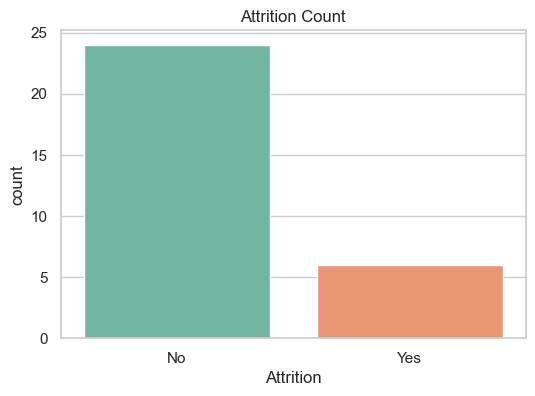

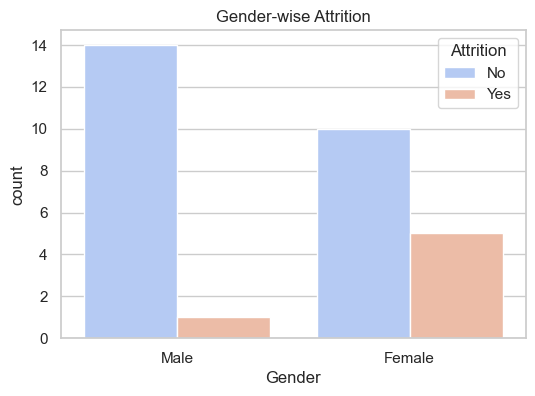

C:\Users\suyas\AppData\Local\Temp\ipykernel_10968\818119898.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Department', palette='Set3')


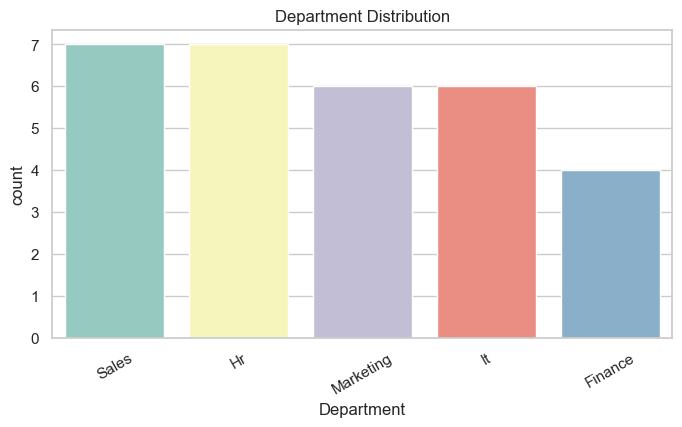

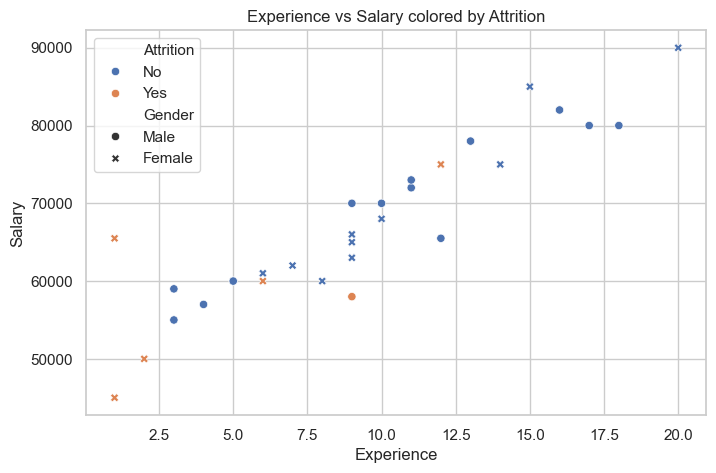

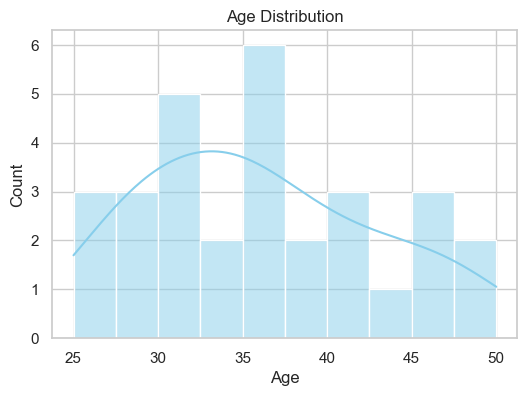

In [17]:
#data visualization
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# === CLEANING STEPS (summary) ===
df['Salary'] = df['Salary'].astype(str).str.lower().str.strip()
df['Salary'] = df['Salary'].replace({
    'sixty thousand': '60000',
    'fifty thousand': '50000',
    'seventy thousand': '70000'
})
df['Salary'] = pd.to_numeric(df['Salary'], errors='coerce')
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['Experience'] = pd.to_numeric(df['Experience'], errors='coerce')

df['Age'] = df['Age'].fillna(df['Age'].median()).astype(int)
df['Salary'] = df['Salary'].fillna(df['Salary'].median()).astype(int)
df['Experience'] = df['Experience'].fillna(df['Experience'].median()).astype(int)

for col in ['Department', 'Attrition', 'Education', 'Gender']:
    df[col] = df[col].astype(str).str.strip().str.title()
    df[col] = df[col].replace('Nan', pd.NA)
    df[col] = df[col].fillna(df[col].mode()[0])

# ======= 📊 Visualizations =======

sns.set(style="whitegrid")

# 1. Attrition Count
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Attrition', palette='Set2')
plt.title('Attrition Count')
plt.show()

# 2. Gender-wise Attrition
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Gender', hue='Attrition', palette='coolwarm')
plt.title('Gender-wise Attrition')
plt.show()

# 3. Department Distribution
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='Department', palette='Set3')
plt.title('Department Distribution')
plt.xticks(rotation=30)
plt.show()

# 4. Experience vs Salary
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Experience', y='Salary', hue='Attrition', style='Gender')
plt.title('Experience vs Salary colored by Attrition')
plt.show()

# 5. Age Distribution
plt.figure(figsize=(6, 4))
sns.histplot(df['Age'], bins=10, kde=True, color='skyblue')
plt.title('Age Distribution')
plt.show()
